# Tune ML models on Titanic data

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

## Importing datasets

### Training data

In [2]:
df_train = pd.read_csv('../data/train.csv')

In [3]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df_train.shape

(891, 12)

### Test data

In [5]:
df_test = pd.read_csv('../data/test.csv')

In [6]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
df_test.shape

(418, 11)

## Data details

### Survival details

In [8]:
df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

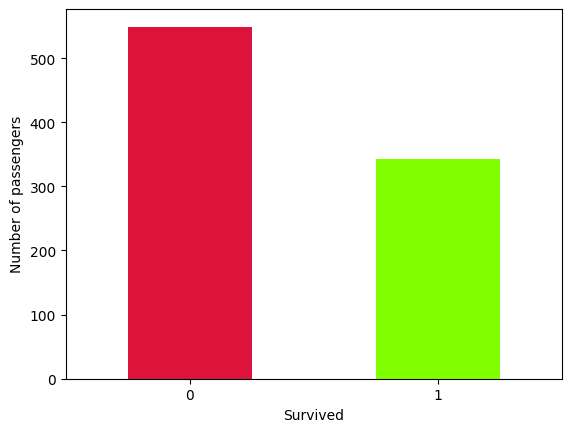

In [9]:
df_train.Survived.value_counts().plot(kind = 'bar', color=['crimson', 'chartreuse'])
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)

### Male vs Female details

In [10]:
df_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

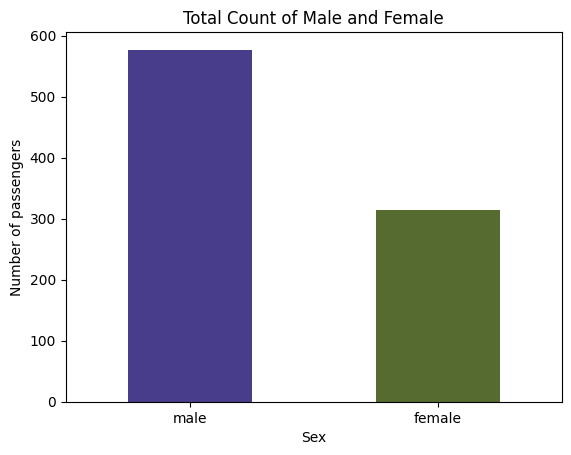

In [11]:
df_train.Sex.value_counts().plot(kind = 'bar', color=['darkslateblue', 'darkolivegreen'])
plt.title("Total Count of Male and Female");
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)

In [12]:
pd.crosstab(df_train.Sex, df_train.Survived)

Survived    0    1
Sex               
female     81  233
male      468  109

### Embarked details

In [13]:
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, 'C'), Text(1, 0, 'Q'), Text(2, 0, 'S')])

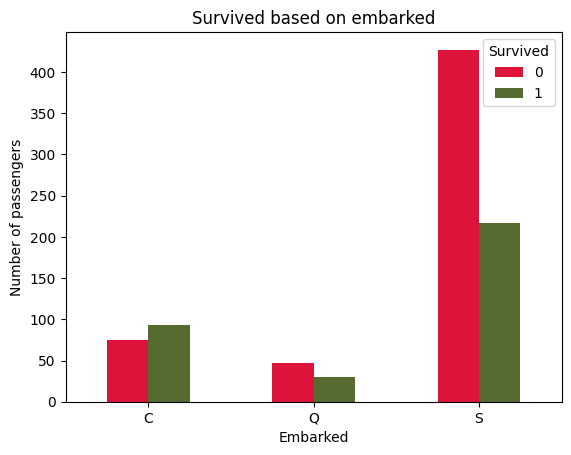

In [14]:
pd.crosstab(df_train.Embarked, df_train.Survived).plot(kind = 'bar', color=['crimson', 'darkolivegreen'])
plt.title("Survived based on embarked");
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)

### Ticket class details

In [15]:
df_train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

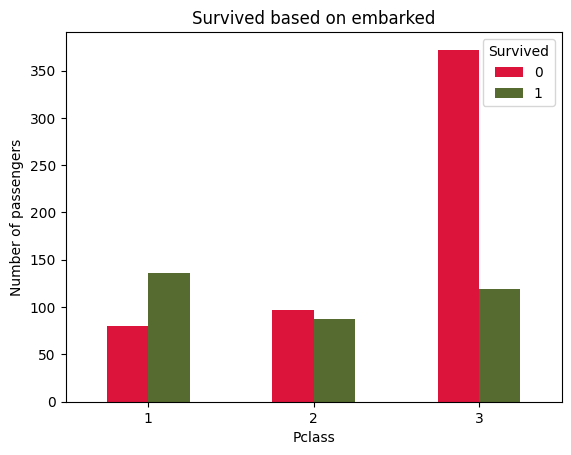

In [16]:
pd.crosstab(df_train.Pclass, df_train.Survived).plot(kind = 'bar', color=['crimson', 'darkolivegreen'])
plt.title("Survived based on embarked");
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)

### Age details

<Axes: ylabel='Frequency'>

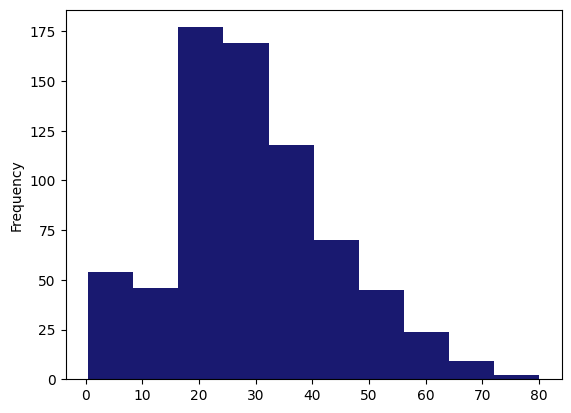

In [17]:
df_train.Age.plot.hist(color='midnightblue')

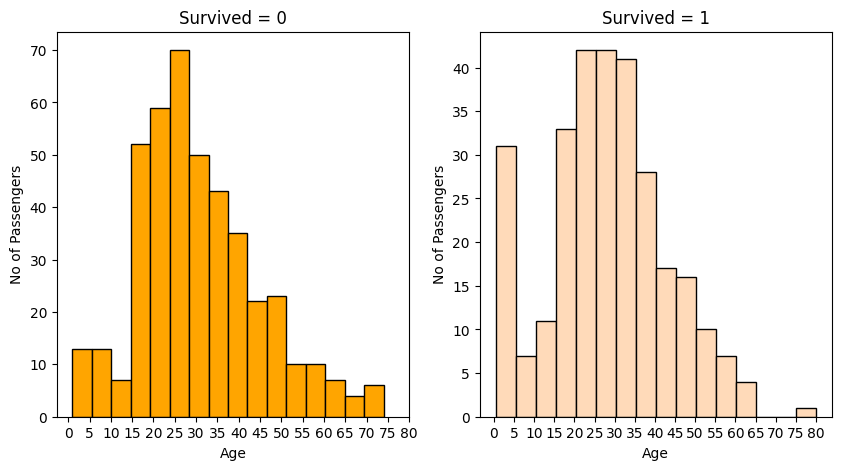

In [18]:
f,ax=plt.subplots(1,2,figsize=(10,5))

df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=16, edgecolor='black',color='orange')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("No of Passengers")

df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='peachpuff',bins=16,edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("No of Passengers")

plt.show();

## Preprocessing data

### Empty values

In [19]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replace all missing age fields with the median age

In [20]:
df_train.Age = df_train.Age.fillna(df_train.Age.median())

Replace all missing embarked fields with 'S'

In [21]:
df_train.Embarked = df_train.Embarked.fillna('S')

Drop unneeded fields

In [22]:
df_train = df_train.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis = 1)

In [23]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Replace Sex (male & female) with 0 & 1. Replace Embarked (S, C, Q) with 0, 1 & 2

In [24]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

/tmp/ipykernel_6611/556027751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
/tmp/ipykernel_6611/556027751.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
/tmp/ipykern

In [25]:
df_train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1         0       3    0  22.0      1      0         0
1            2         1       1    1  38.0      1      0         1
2            3         1       3    1  26.0      0      0         0
3            4         1       1    1  35.0      1      0         0
4            5         0       3    0  35.0      0      0         0

## Spliting data


### X & y splits

In [26]:
X = df_train.drop(['Survived'], axis = 1)
y = df_train['Survived']

Training and test splits

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

## Models

In [29]:
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=300)
svm = LinearSVC()
knn = KNeighborsClassifier()

In [30]:
models = {
    'rf': rf,
    'lr': lr,
    'svm': svm,
    'knn': knn
}

Model scores

In [31]:
scores = {}

In [32]:
for name, model in models.items():
  model.fit(X_train, y_train)
  scores[name] = model.score(X_test, y_test)

In [33]:
scores

{'rf': 0.8379888268156425,
 'lr': 0.8100558659217877,
 'svm': 0.7932960893854749,
 'knn': 0.5307262569832403}

### Tuning models using RandomizedSearchCV

Random forest grid

In [34]:
rf_grid = {
    'n_estimators': [1, 10, 100, 200, 300, 400, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

Tune with RandomizedSearchCV

In [35]:
rf_rand_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_grid, cv=5, n_iter=20, verbose=2)

In [36]:
rf_rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [1, 10, 100, 200, 300,
                                                         400, 500, 1000]},
                   verbose=2)

In [37]:
rf_rand_search.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

In [38]:
rf_rand_search.best_score_

0.8300600807643063

Tune with GridSearchCV

In [39]:
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_grid, n_jobs=-1, cv=5, verbose=2)

In [40]:
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=  

In [42]:
rf_grid_search.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 18,
 'n_estimators': 100}

In [ ]:
rf_grid_search.